In [42]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [43]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

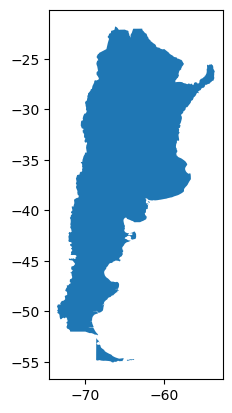

In [24]:
argentina=countries[countries.COUNTRY=='Argentina']

argentina.plot()


<Axes: >

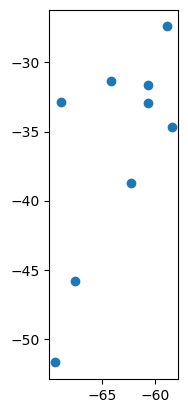

In [25]:
ciudades_argentina=cities[cities.COUNTRY=='Argentina']

ciudades_argentina.plot()

<Axes: >

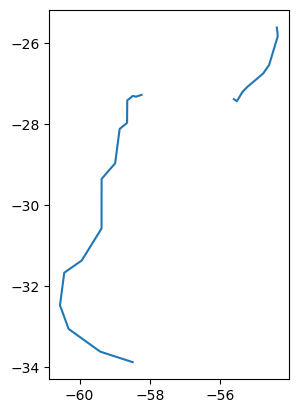

In [26]:
rios_argentina=gpd.clip(gdf=rivers, mask=argentina)

rios_argentina.plot()

In [60]:
argentina_coordenada=[-34.61315, -58.37723]

In [61]:
argentina.to_crs(22171).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

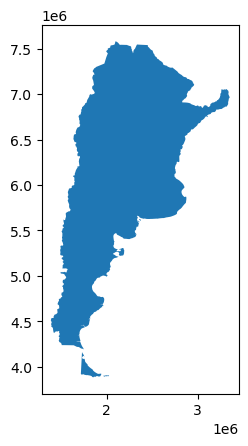

In [62]:
argentina.to_crs(22171).plot()

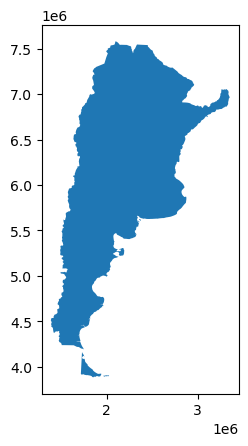

In [63]:
mapabase4839=argentina.to_crs(22171).plot()

#alemania.to_crs(4839).centroid.plot(color='pink',ax=mapabase4839)

<Axes: >

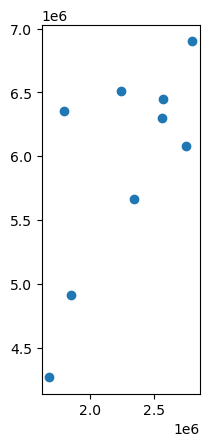

In [64]:
argentina22171=argentina.to_crs(22171)
ciudades_argentina=cities[cities.COUNTRY=='Argentina']
ciudades22171=ciudades_argentina.to_crs(argentina22171.crs)#que estas ciudaes se representen dentro del mapa como coordenadas

ciudades22171.plot()

<Axes: >

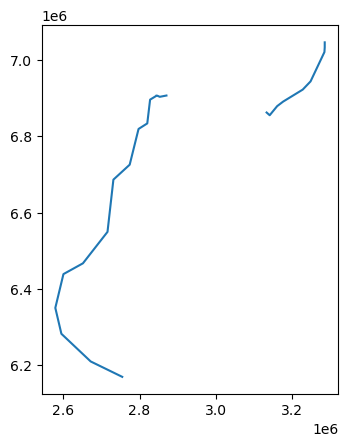

In [65]:
rios22171=rivers.to_crs(argentina22171.crs)
rios22171=gpd.clip(gdf=rios22171, mask=argentina22171)

rios22171.plot()

<Axes: >

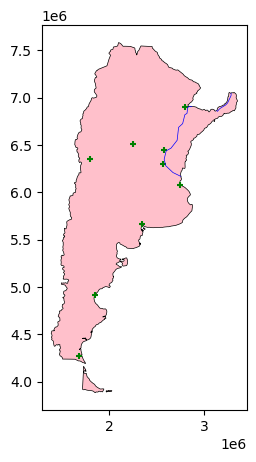

In [66]:
mapabase=argentina22171.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
ciudades22171.plot(marker='+',color='green', markersize=16,ax=mapabase)
rios22171.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

In [67]:
argentina_coordenada=[-34.61315, -58.37723]

In [68]:
import folium
m=ciudades22171.explore(location=argentina_coordenada,zoom_start=5,tiles='cartoDB positron',color='pink', name="cities")

m=rios22171.explore(m=m,color='blue',name="rivers")

folium.LayerControl().add_to(m)

m

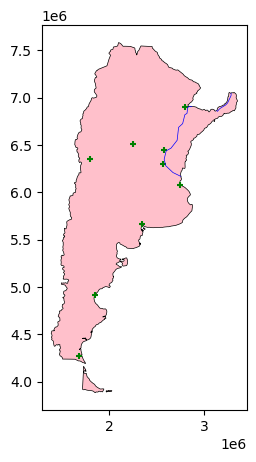

In [69]:
import matplotlib.pyplot as plt

mapabase=argentina22171.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
mapa2=ciudades22171.plot(marker='+',color='green', markersize=16,ax=mapabase)
mapa3=rios22171.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

plt.savefig(os.path.join("figures",'mapa3.jpg'))

In [72]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [73]:
worldMaps='https://github.com/Romina300/simpleplot/raw/main/maps/worldMaps.gpkg'

In [82]:
#from  fiona import listlayers

#listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [79]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [81]:
import os

argentina22171.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='country', driver="GPKG")
ciudades22171.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='cities', driver="GPKG")
rios22171.to_file(os.path.join("maps","argentina22171","argentinaMaps22171.gpkg"), layer='rivers', driver="GPKG")


In [83]:
link_argentinaMaps22171='https://github.com/Romina300/simpleplot/raw/main/maps/argentina22171/argentinaMaps22171.gpkg'

In [84]:
from  fiona import listlayers

listlayers(link_argentinaMaps22171)

['country', 'cities', 'rivers']

In [ ]:
#countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
#cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
#rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")